<a href="https://colab.research.google.com/github/sdavarzani/Hybrid-Images/blob/main/Hybrid_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Importing libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io
import math
from scipy import signal

## Hybrid images

In [ ]:
# Accessing the Google Drive
from google.colab import drive
drive.mount('/content/drive')
img_path="/content/4a_bird.bmp"  # Location of the image on the Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Demonstraion of the image
import cv2
from google.colab.patches import cv2_imshow
import click
from skimage import io
from PIL import Image
import numpy as np

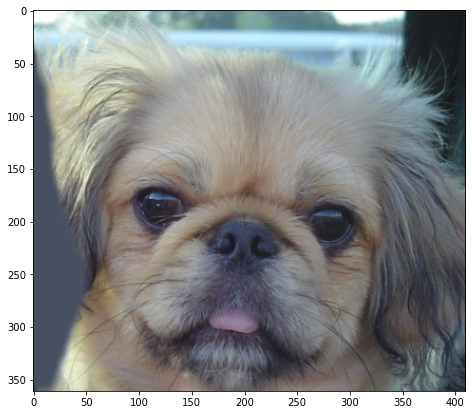

In [ ]:
einstein= np.array(Image.open(img_path).convert('RGB'))
plt.figure(figsize = (10,7))
plt.imshow(einstein)

In [ ]:
# Another array in the same size with our image has been created to compose channels back
img=einstein

R=einstein[:,:,0]                              # Red, Green and Blue channels have been separated.
G=einstein[:,:,1]
B=einstein[:,:,2]

sig=12

Gaussian_Filtered_red= gaussconvolve2d(R,sig)
Gaussian_Filtered_green= gaussconvolve2d(G,sig)
Gaussian_Filtered_blue= gaussconvolve2d(B,sig)

In [ ]:
img[:,:,0]=Gaussian_Filtered_red[:,:]                        # Channels have been composed back together within one array.
img[:,:,1]=Gaussian_Filtered_green[:,:]
img[:,:,2]=Gaussian_Filtered_blue[:,:]

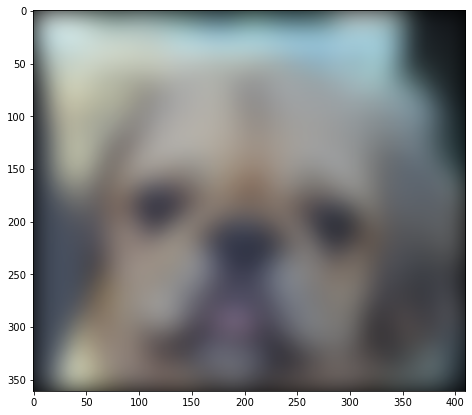

Blurred Image


In [ ]:
from PIL import Image
filtered_img =Image.fromarray((img).astype(np.uint8))                            # Array is converted back to image.
plt.figure(figsize = (10,7))
plt.imshow(filtered_img)
plt.show()
print('Blurred Image')                                                           # Blurred Image has been shown

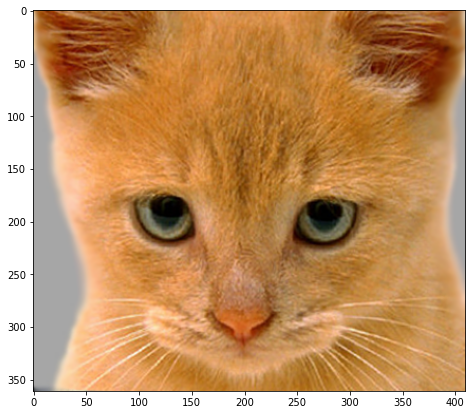

In [ ]:
img_path2="/content/4b_plane.bmp"   # Location of the image on the Google Drive
marilyn= np.array(Image.open(img_path2).convert('RGB'))
plt.figure(figsize = (10,7))      #Showing the output image
plt.imshow(marilyn)

In [ ]:
img2=marilyn
R2=marilyn[:,:,0]                               # Red, Green and Blue channels have been separated.
G2=marilyn[:,:,1]
B2=marilyn[:,:,2]
sig=12
Gaussian_Filtered_red_M= gaussconvolve2d(R2,sig)
Gaussian_Filtered_green_M= gaussconvolve2d(G2,sig)
Gaussian_Filtered_blue_M= gaussconvolve2d(B2,sig)

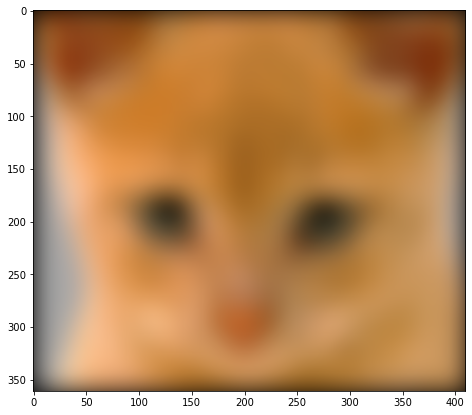

Blurred Image


In [ ]:
# Channels have been composed back together using dstack() function
low_filtered_marilyn = np.dstack((Gaussian_Filtered_red_M,Gaussian_Filtered_green_M,Gaussian_Filtered_blue_M))
low_filtered_marilyn  = np.asarray(low_filtered_marilyn ).astype('int')   # Array is converted back to image.
plt.figure(figsize = (10,7))
plt.imshow(low_filtered_marilyn)
plt.show()
print('Blurred Image')                                                           # Blurred Image has been shown

2.2)

High Frequency

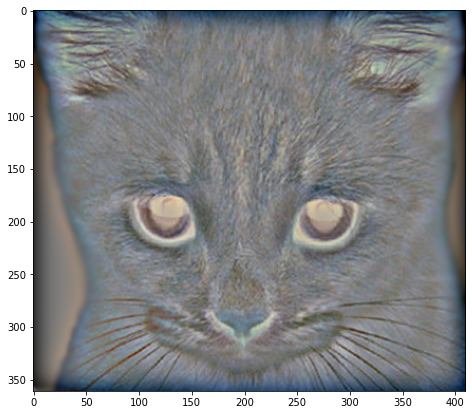

High Frequency Image


In [ ]:
marilyn_high_filter  = (low_filtered_marilyn -marilyn)+128 # Substracting low frequency image from original one and dding 128 to every value for visualization.
marilyn_high_img=np.asarray(marilyn_high_filter).astype('int')   # Array is converted back to image.
plt.figure(figsize = (10,7))
plt.imshow(marilyn_high_img)                                      #Showing the output image
plt.show()
print('High Frequency Image')


2.3

In [ ]:
 # Red, Green, and Blue channels of the high-pass filtered image have been separated.
marilyn_high_img_red=marilyn_high_img[:,:,0]
marilyn_high_img_green=marilyn_high_img[:,:,1]
marilyn_high_img_blue=marilyn_high_img[:,:,2]

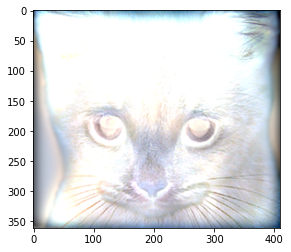

In [ ]:
# The channels of the high-pass filtered image have been added to the channels of low-pass filtered image.
hybrid_red = marilyn_high_img_red+Gaussian_Filtered_red
hybrid_green =marilyn_high_img_green+ Gaussian_Filtered_green
hybrid_blue =  marilyn_high_img_blue+ Gaussian_Filtered_blue
# Separated Channels have been composed back together
hybrid_image = np.dstack((hybrid_red,hybrid_green ,hybrid_blue))
hybrid_image = np.asarray(hybrid_image).astype('int')
plt.imshow(hybrid_image)